### Импорты

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from yellowbrick.cluster import KElbowVisualizer

from scipy.cluster.hierarchy import dendrogram , linkage

from sklearn.metrics import silhouette_score

### Загрузка данных

In [2]:
data = pd.read_csv("../data/credit_card.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Нормировка и удаление нулевых значений

In [4]:
data = data.dropna()
data = data.drop("CUST_ID", axis=1)

In [5]:
scaler = StandardScaler()
data = pd.DataFrame(columns=data.columns, data=scaler.fit_transform(data))

## Task 1 (easy)

### Применим Elbow method чтобы найти оптимальное количество классов

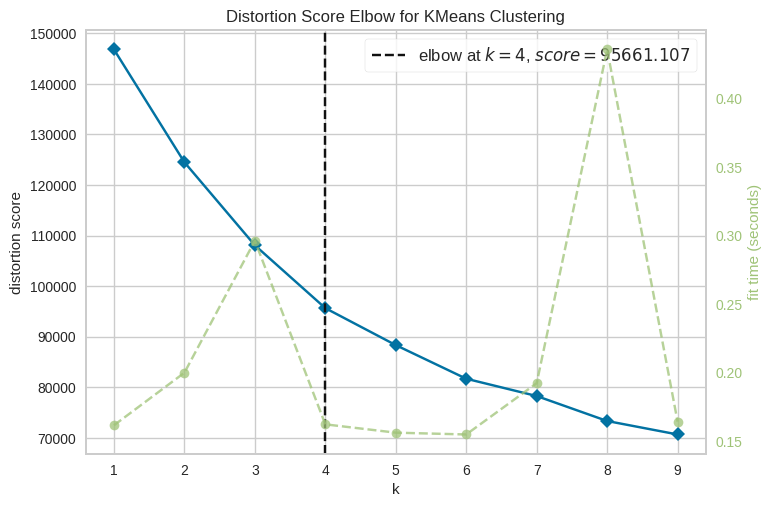

In [6]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(data)
visualizer.show()
None

- Получили 4 класса

### Визуализируем

In [7]:
model = KMeans(n_clusters=4)
model_labels = model.fit_predict(data)
data["kmeans_4"] = model_labels

In [8]:
# Смотреть в директории content

# sns.pairplot(data, hue="kmeans_4")
# None

In [9]:
data["kmeans_4"].value_counts()

kmeans_4
3    3805
2    3281
1    1156
0     394
Name: count, dtype: int64

Исходя из графика:
- В нулевой класс попали люди с низким PURCHASES_FREQUENCY
- В первый класс попали люди с высоким PURCHASES_INSTALLMENTS_FREQUENCY и высоким PURCHASES_FREQUENCY
- В третий класс попали люди с CASH_ADVANCE и CASH_ADVANCE_FREQUENCY
- Во второй примерно все остальные

## Task 2 (medium)

### Повторим действия для AgglomerativeClustering

In [10]:
data = data.drop("kmeans_4", axis=1)

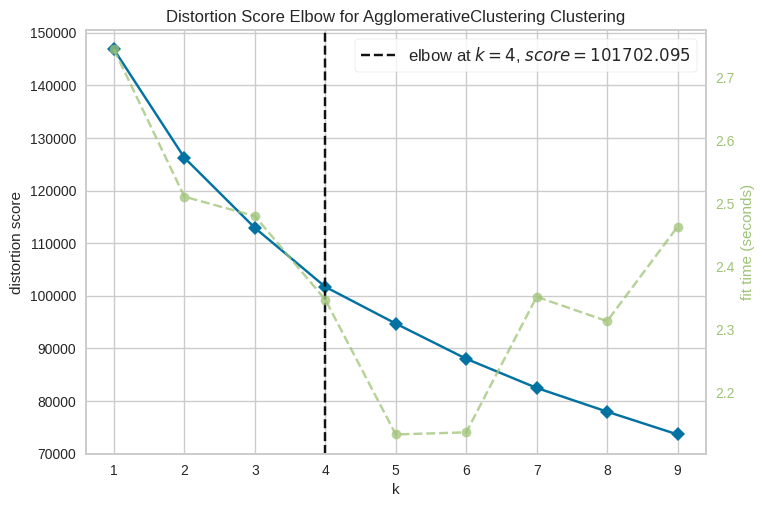

In [11]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(data)
visualizer.show()
None

In [12]:
model = AgglomerativeClustering(n_clusters=4)
model_labels = model.fit_predict(data)
data["agglomeration_4"] = model_labels

In [13]:
# Смотреть в директории content

# sns.pairplot(data, hue="agglomeration_4")
# None

In [14]:
data["agglomeration_4"].value_counts()

agglomeration_4
0    4346
3    2731
2    1122
1     437
Name: count, dtype: int64

### Иерархическая

In [15]:
data = data.drop("agglomeration_4", axis=1)

In [16]:
# Смотреть в директории content

# tree = linkage(data, method = 'ward')
# dendro = dendrogram(tree)

### Теперь для DBSCAN

In [17]:
ans = (0, (0, 0)) 
for eps in np.linspace(0.1, 1, 3):
    for min_samples in np.linspace(1, 10, 3):
        model = DBSCAN(eps=eps, min_samples=int(min_samples))
        res = silhouette_score(data, model.fit_predict(data))
        if res > ans[0]:
            ans = (res, (eps, min_samples))
print(ans)

(0.07797785013672784, (1.0, 10.0))
